<a href="https://colab.research.google.com/github/merfurfu/Computer-Vision-Project/blob/vic_work/vicwork_ComputerVisionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b> Object Classification Using YOLO <b> </h1></center>

Classifying red onions and apples based on images taken at supermarkets.

## Importing required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/Colab Notebooks/Computer Vision"
!ls

/content/drive/MyDrive/Colab Notebooks/Computer Vision
'Computer Vision Idea & Plan.gdoc'   Photos	    prediction3.jpg   yolov8n-cls.pt
'Oranges (just in case)'	     predict1.jpg   runs	      yolov8s-cls.pt


First install and import

In [4]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/107.7 GB disk)


In [5]:
from ultralytics import YOLO

## Loading Pre-Trained YOLO

### Model 1  (nano, epochs=2, patience=5, batch=8, lr0=0.0005, imgsz=640)(train2old) (train5)

In [23]:
model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model

Please look at [Yolo train Docs](https://docs.ultralytics.com/modes/train/#train-settings) for hyperparameters for model tuning and configuration, e.g. lr0, imgsz, model etc.

In [24]:
#Training model 1 with our own data
model.train(data="/content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos",epochs=2,patience=5,batch=8, lr0=0.0005,imgsz=640)

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos, epochs=2, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

train: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... 46 images, 0 corrupt: 100%|██████████| 46/46 [00:00<00:00, 99.52it/s] 

train: New cache created: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train.cache



val: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... 24 images, 0 corrupt: 100%|██████████| 24/24 [00:00<00:00, 119.69it/s]

val: New cache created: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/classify/train5
Starting training for 2 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:18<00:00,  9.01s/it]

                   all      0.583          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:14<00:00,  7.19s/it]

                   all      0.625          1



2 epochs completed in 0.033 hours.
Optimizer stripped from runs/classify/train5/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train5/weights/best.pt, 3.0MB

Validating runs/classify/train5/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... found 56 images in 2 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... found 26 images in 2 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:13<00:00,  6.76s/it]


                   all      0.625          1
Speed: 0.0ms preprocess, 90.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train5
Results saved to runs/classify/train5


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e8f6df5c430>
curves: []
curves_results: []
fitness: 0.8125
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.625, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8125}
save_dir: PosixPath('runs/classify/train5')
speed: {'preprocess': 0.0020662943522135415, 'inference': 90.43650825818379, 'loss': 0.0002483526865641276, 'postprocess': 0.00018874804178873697}
task: 'classify'
top1: 0.625
top5: 1.0

### Model 2 (n, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640) (train3old) (train7)

In [25]:
model2 = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model

In [26]:
#Training model 1 with our own data
model2.train(data="/content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos",epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos, epochs=15, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

train: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... 46 images, 0 corrupt: 100%|██████████| 46/46 [00:00<?, ?it/s]
val: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... 24 images, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/classify/train7
Starting training for 15 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:18<00:00,  9.31s/it]

                   all      0.583          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:13<00:00,  6.72s/it]

                   all      0.625          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:13<00:00,  6.66s/it]

                   all      0.583          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:15<00:00,  7.92s/it]

                   all      0.625          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:13<00:00,  6.71s/it]

                   all      0.625          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:13<00:00,  6.69s/it]

                   all      0.792          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:15<00:00,  7.51s/it]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:13<00:00,  6.60s/it]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:13<00:00,  6.68s/it]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


      10/15         0G     0.3747          6        640: 100%|██████████| 6/6 [00:40<00:00,  6.75s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:13<00:00,  6.68s/it]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


      11/15         0G     0.3859          6        640: 100%|██████████| 6/6 [00:39<00:00,  6.57s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:13<00:00,  6.82s/it]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


      12/15         0G     0.3302          6        640: 100%|██████████| 6/6 [00:39<00:00,  6.52s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:13<00:00,  6.67s/it]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


      13/15         0G     0.3577          6        640: 100%|██████████| 6/6 [00:40<00:00,  6.69s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:13<00:00,  6.72s/it]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


      14/15         0G     0.3529          6        640: 100%|██████████| 6/6 [00:38<00:00,  6.34s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:13<00:00,  6.87s/it]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


      15/15         0G     0.3375          6        640: 100%|██████████| 6/6 [00:38<00:00,  6.49s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:13<00:00,  6.73s/it]

                   all      0.875          1



15 epochs completed in 0.228 hours.
Optimizer stripped from runs/classify/train7/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train7/weights/best.pt, 3.0MB

Validating runs/classify/train7/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... found 56 images in 2 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... found 26 images in 2 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:13<00:00,  6.73s/it]


                   all      0.875          1
Speed: 0.0ms preprocess, 102.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train7
Results saved to runs/classify/train7


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e8f6a438e50>
curves: []
curves_results: []
fitness: 0.9375
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.875, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9375}
save_dir: PosixPath('runs/classify/train7')
speed: {'preprocess': 0.002572933832804362, 'inference': 102.70613431930542, 'loss': 0.00030795733133951825, 'postprocess': 0.00017881393432617188}
task: 'classify'
top1: 0.875
top5: 1.0

### Model 3 (s, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640) (train4old) (train8)

same paramters as model 2 but on pretrained yolo model s NOT nano

In [33]:
model3 = YOLO('yolov8s-cls.pt')  # load a pretrained YOLOv8n classification model

In [38]:
#Training model 1 with our own data
model3.train(data="/content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos",epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos, epochs=15, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

train: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... 46 images, 0 corrupt: 100%|██████████| 46/46 [00:00<?, ?it/s]
val: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... 24 images, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/classify/train8
Starting training for 15 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:18<00:00,  9.17s/it]

                   all      0.208          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:18<00:00,  9.11s/it]

                   all      0.583          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:18<00:00,  9.30s/it]

                   all      0.625          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:19<00:00,  9.65s/it]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:18<00:00,  9.15s/it]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:19<00:00,  9.79s/it]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:18<00:00,  9.01s/it]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:19<00:00,  9.95s/it]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:20<00:00, 10.30s/it]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


      10/15         0G     0.3328          6        640: 100%|██████████| 6/6 [01:14<00:00, 12.42s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:19<00:00,  9.66s/it]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


      11/15         0G      0.321          6        640: 100%|██████████| 6/6 [01:11<00:00, 11.85s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:18<00:00,  9.13s/it]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


      12/15         0G     0.2827          6        640: 100%|██████████| 6/6 [01:14<00:00, 12.34s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:18<00:00,  9.13s/it]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


      13/15         0G     0.3175          6        640: 100%|██████████| 6/6 [01:12<00:00, 12.05s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:20<00:00, 10.45s/it]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


      14/15         0G     0.2899          6        640: 100%|██████████| 6/6 [01:10<00:00, 11.80s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:17<00:00,  8.89s/it]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


      15/15         0G     0.3041          6        640: 100%|██████████| 6/6 [01:12<00:00, 12.04s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:19<00:00,  9.82s/it]

                   all      0.917          1



15 epochs completed in 0.394 hours.
Optimizer stripped from runs/classify/train8/weights/last.pt, 10.3MB
Optimizer stripped from runs/classify/train8/weights/best.pt, 10.3MB

Validating runs/classify/train8/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s-cls summary (fused): 73 layers, 5077762 parameters, 0 gradients, 12.4 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... found 56 images in 2 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... found 26 images in 2 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:19<00:00,  9.88s/it]


                   all      0.917          1
Speed: 0.0ms preprocess, 319.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train8
Results saved to runs/classify/train8


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e8fa17a7730>
curves: []
curves_results: []
fitness: 0.9583333432674408
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9166666865348816, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9583333432674408}
save_dir: PosixPath('runs/classify/train8')
speed: {'preprocess': 0.002463658650716146, 'inference': 319.07299160957336, 'loss': 0.000288089116414388, 'postprocess': 0.00013907750447591147}
task: 'classify'
top1: 0.9166666865348816
top5: 1.0

### Model 4 (m, epochs=22,patience=5,batch=8, imgsz=640) (train6old) (train9)

In [47]:
model4 = YOLO('yolov8m-cls.pt')  # load a pretrained YOLOv8n classification model

In [46]:
#from previous models, there is no need for lr0, it determines it automatically
#trained from a previously (incorrectly) done model the most effective is around 16, so i will use 17 for this run
model4.train(data="/content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos",epochs=17,patience=5,batch=8, imgsz=640)

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos, epochs=22, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

train: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... 46 images, 0 corrupt: 100%|██████████| 46/46 [00:00<?, ?it/s]
val: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... 24 images, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/classify/train9
Starting training for 22 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:33<00:00, 16.64s/it]

                   all      0.375          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:33<00:00, 16.82s/it]

                   all      0.542          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:38<00:00, 19.26s/it]

                   all      0.583          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:34<00:00, 17.19s/it]

                   all      0.625          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:37<00:00, 18.96s/it]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:37<00:00, 18.74s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:35<00:00, 17.64s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:35<00:00, 17.64s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:35<00:00, 17.53s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      10/22         0G     0.2781          6        640: 100%|██████████| 6/6 [03:00<00:00, 30.16s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:34<00:00, 17.23s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      11/22         0G     0.2519          6        640: 100%|██████████| 6/6 [02:57<00:00, 29.54s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:36<00:00, 18.06s/it]

                   all      0.958          1



      Epoch    GPU_mem       loss  Instances       Size


      12/22         0G     0.2038          6        640: 100%|██████████| 6/6 [03:00<00:00, 30.13s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:35<00:00, 17.62s/it]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


      13/22         0G     0.2235          6        640: 100%|██████████| 6/6 [02:55<00:00, 29.28s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:37<00:00, 18.67s/it]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


      14/22         0G     0.1849          6        640: 100%|██████████| 6/6 [02:56<00:00, 29.45s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:34<00:00, 17.45s/it]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


      15/22         0G     0.1659          6        640: 100%|██████████| 6/6 [03:02<00:00, 30.39s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:35<00:00, 17.84s/it]

                   all      0.917          1
Stopping training early as no improvement observed in last 5 epochs. Best results observed at epoch 10, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



15 epochs completed in 0.916 hours.
Optimizer stripped from runs/classify/train9/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train9/weights/best.pt, 31.7MB

Validating runs/classify/train9/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8m-cls summary (fused): 103 layers, 15765218 parameters, 0 gradients, 41.6 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... found 56 images in 2 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... found 26 images in 2 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:34<00:00, 17.27s/it]


                   all          1          1
Speed: 0.0ms preprocess, 958.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train9
Results saved to runs/classify/train9


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e8f6a83d090>
curves: []
curves_results: []
fitness: 1.0
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
save_dir: PosixPath('runs/classify/train9')
speed: {'preprocess': 0.0020166238149007163, 'inference': 958.0622017383575, 'loss': 0.0002980232238769531, 'postprocess': 0.00017881393432617188}
task: 'classify'
top1: 1.0
top5: 1.0

## Refining the model with best weights


### Model 1 (nano, epochs=2, patience=5, batch=8, lr0=0.0005, imgsz=640)

In [27]:
model = YOLO("/content/drive/MyDrive/Colab Notebooks/Computer Vision/runs/classify/train5/weights/best.pt")

### Model 2 (n, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)

In [28]:
model2 = YOLO("/content/drive/MyDrive/Colab Notebooks/Computer Vision/runs/classify/train7/weights/best.pt")

### Model 3 (s, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)

In [39]:
model3 = YOLO("/content/drive/MyDrive/Colab Notebooks/Computer Vision/runs/classify/train8/weights/best.pt")

### Model 4 (m, epochs=25,patience=5,batch=8, imgsz=640)

In [49]:
model4 = YOLO("/content/drive/MyDrive/Colab Notebooks/Computer Vision/runs/classify/train9/weights/best.pt")

## Evaluation Metrics

### Model 1 (nano, epochs=2, patience=5, batch=8, lr0=0.0005, imgsz=640) (val4old) (val10)

In [29]:
#MODEL1 (nano, epochs=2, patience=5, batch=8, lr0=0.0005, imgsz=640)
#running metrics for model 1
metrics1 = model.val()
#because we only have 2 classes!
metrics1.top1

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... found 56 images in 2 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... found 26 images in 2 classes ✅ 
test: None...


val: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... 24 images, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:14<00:00,  7.28s/it]


                   all      0.625          1
Speed: 0.0ms preprocess, 102.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val10


0.625

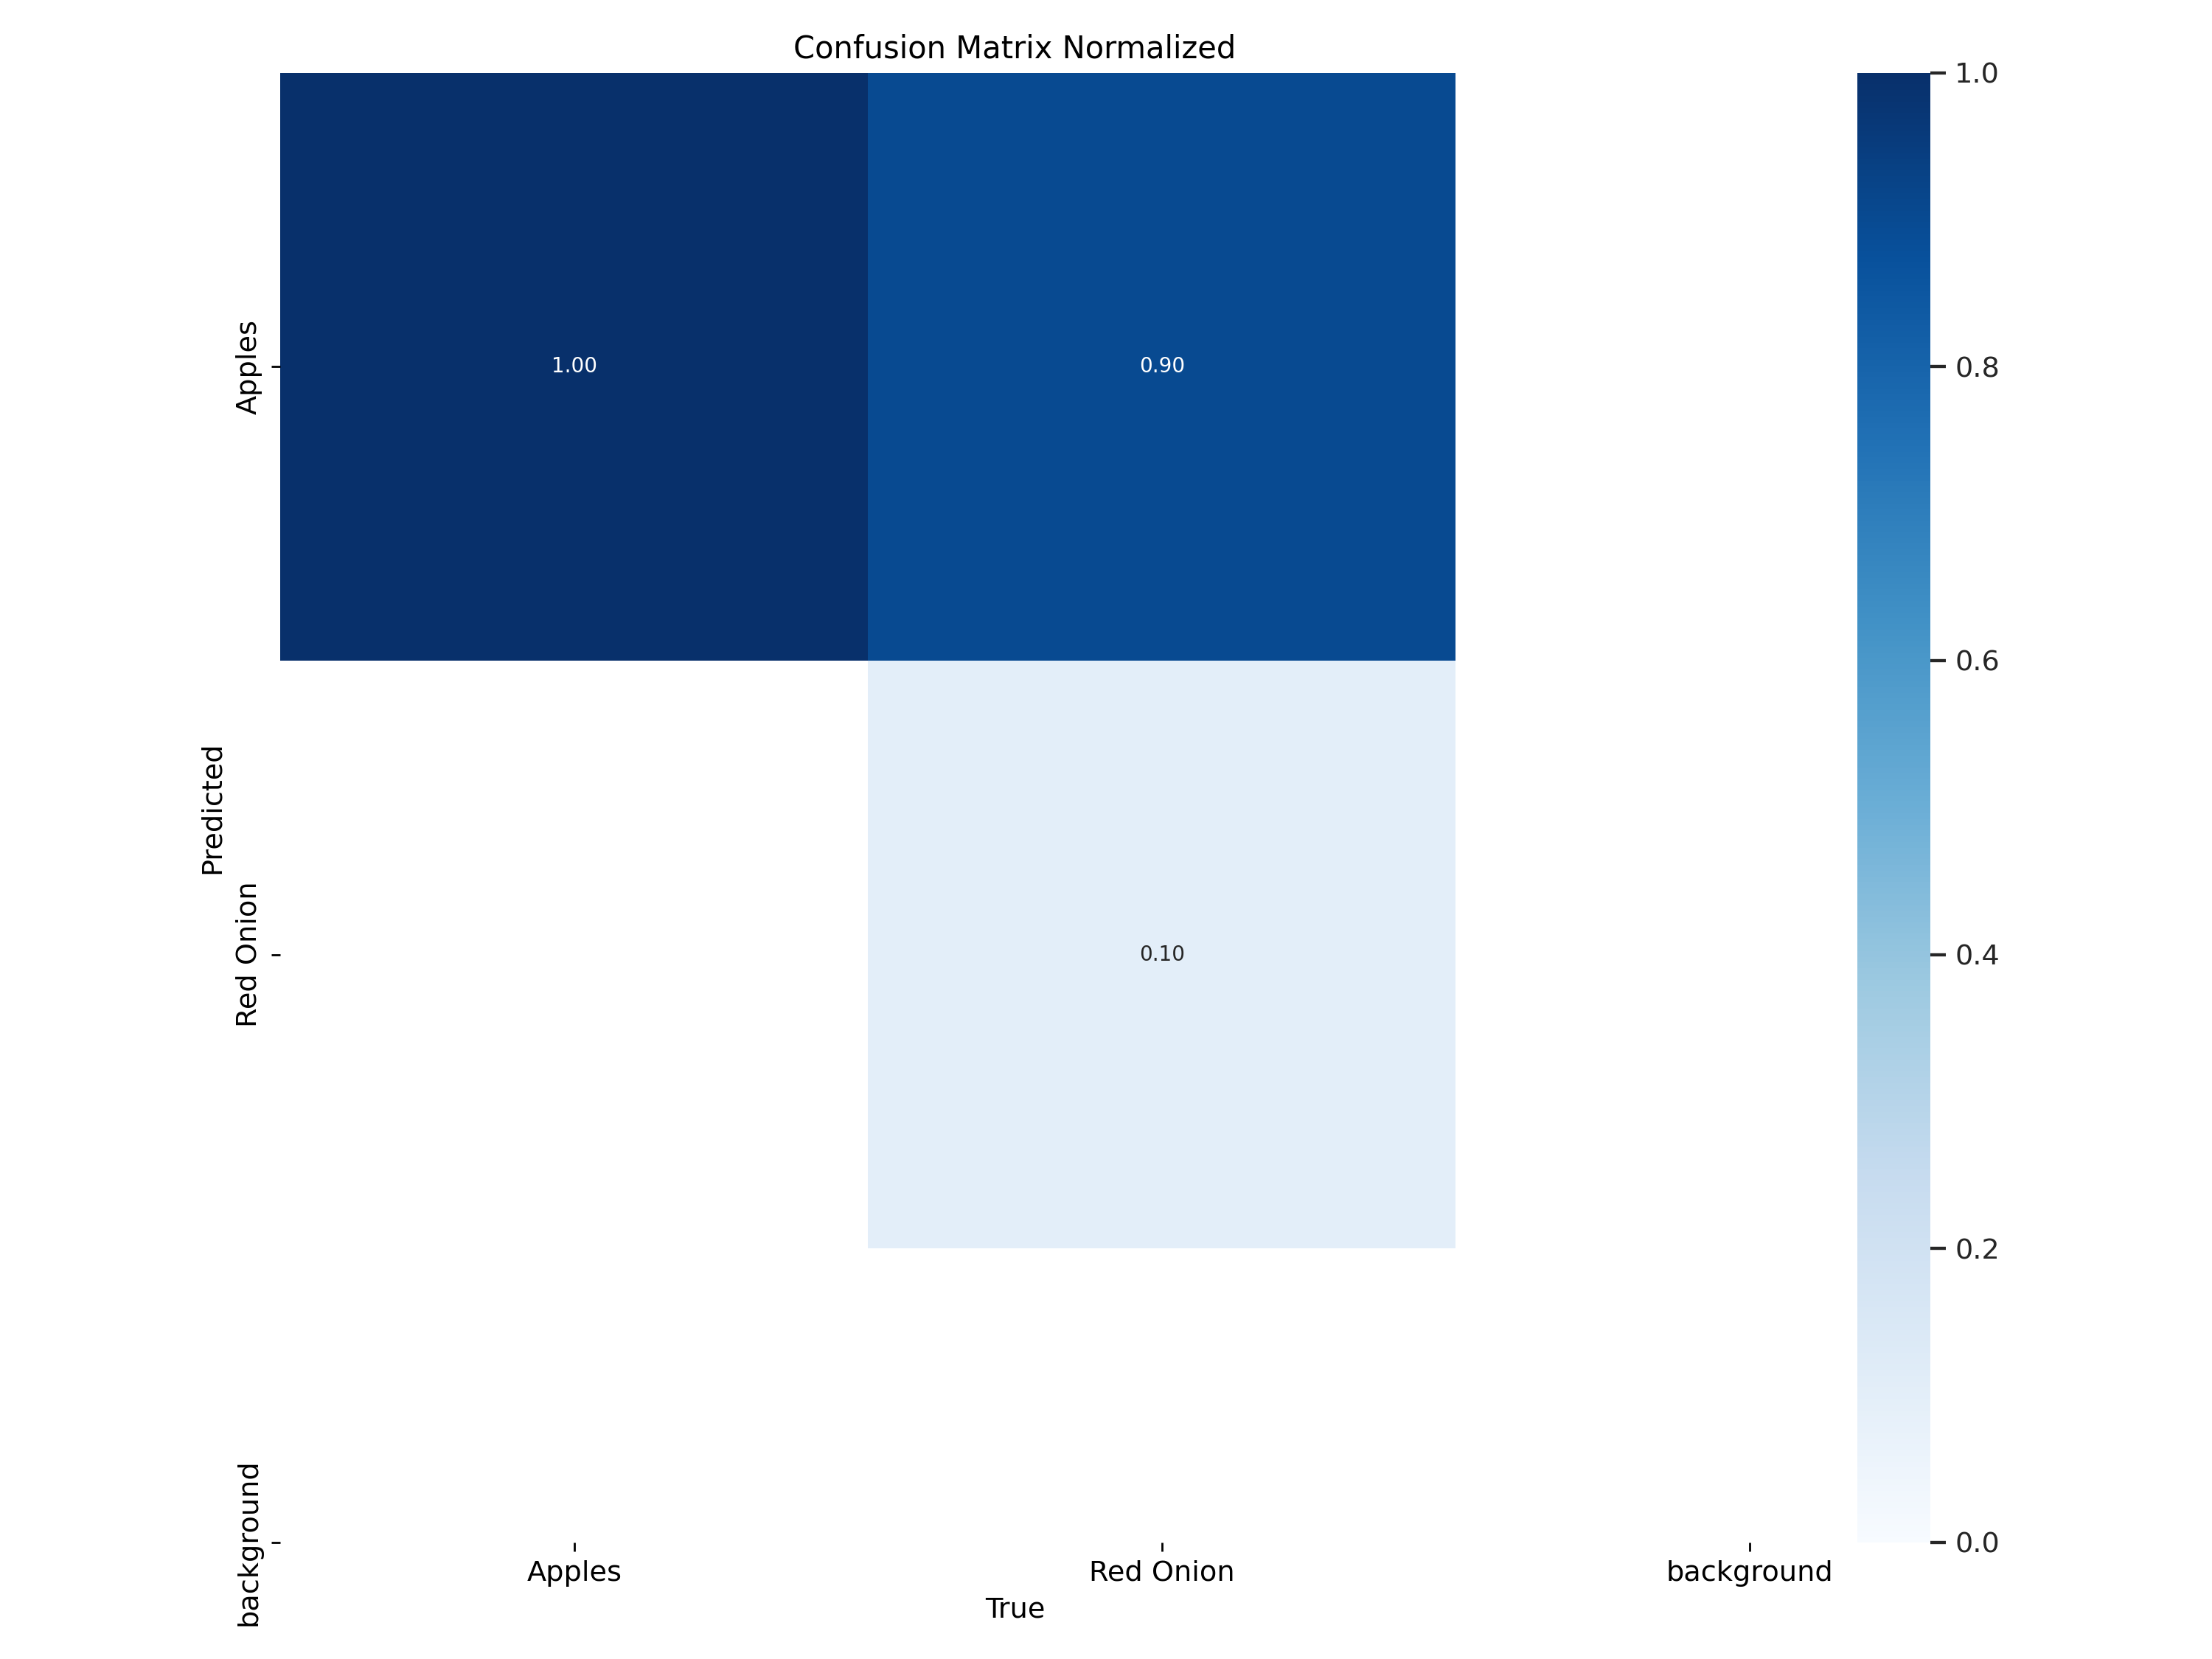

In [30]:
%matplotlib inline
from PIL import Image

#confusing matrix for train 2 (model 1, nano epochs=2,patience=5,batch=8, lr0=0.0005,imgsz=640)
Image.open('/content/drive/MyDrive/Colab Notebooks/Computer Vision/runs/classify/val10/confusion_matrix_normalized.png')

### Model 2 (n, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640) (val5old) (val11)

In [31]:
#MODE2 (n, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)

metrics2 = model2.val()
#because we only have 2 classes!
metrics2.top1

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... found 56 images in 2 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... found 26 images in 2 classes ✅ 
test: None...


val: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... 24 images, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:14<00:00,  7.11s/it]


                   all      0.875          1
Speed: 0.0ms preprocess, 99.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val11


0.875

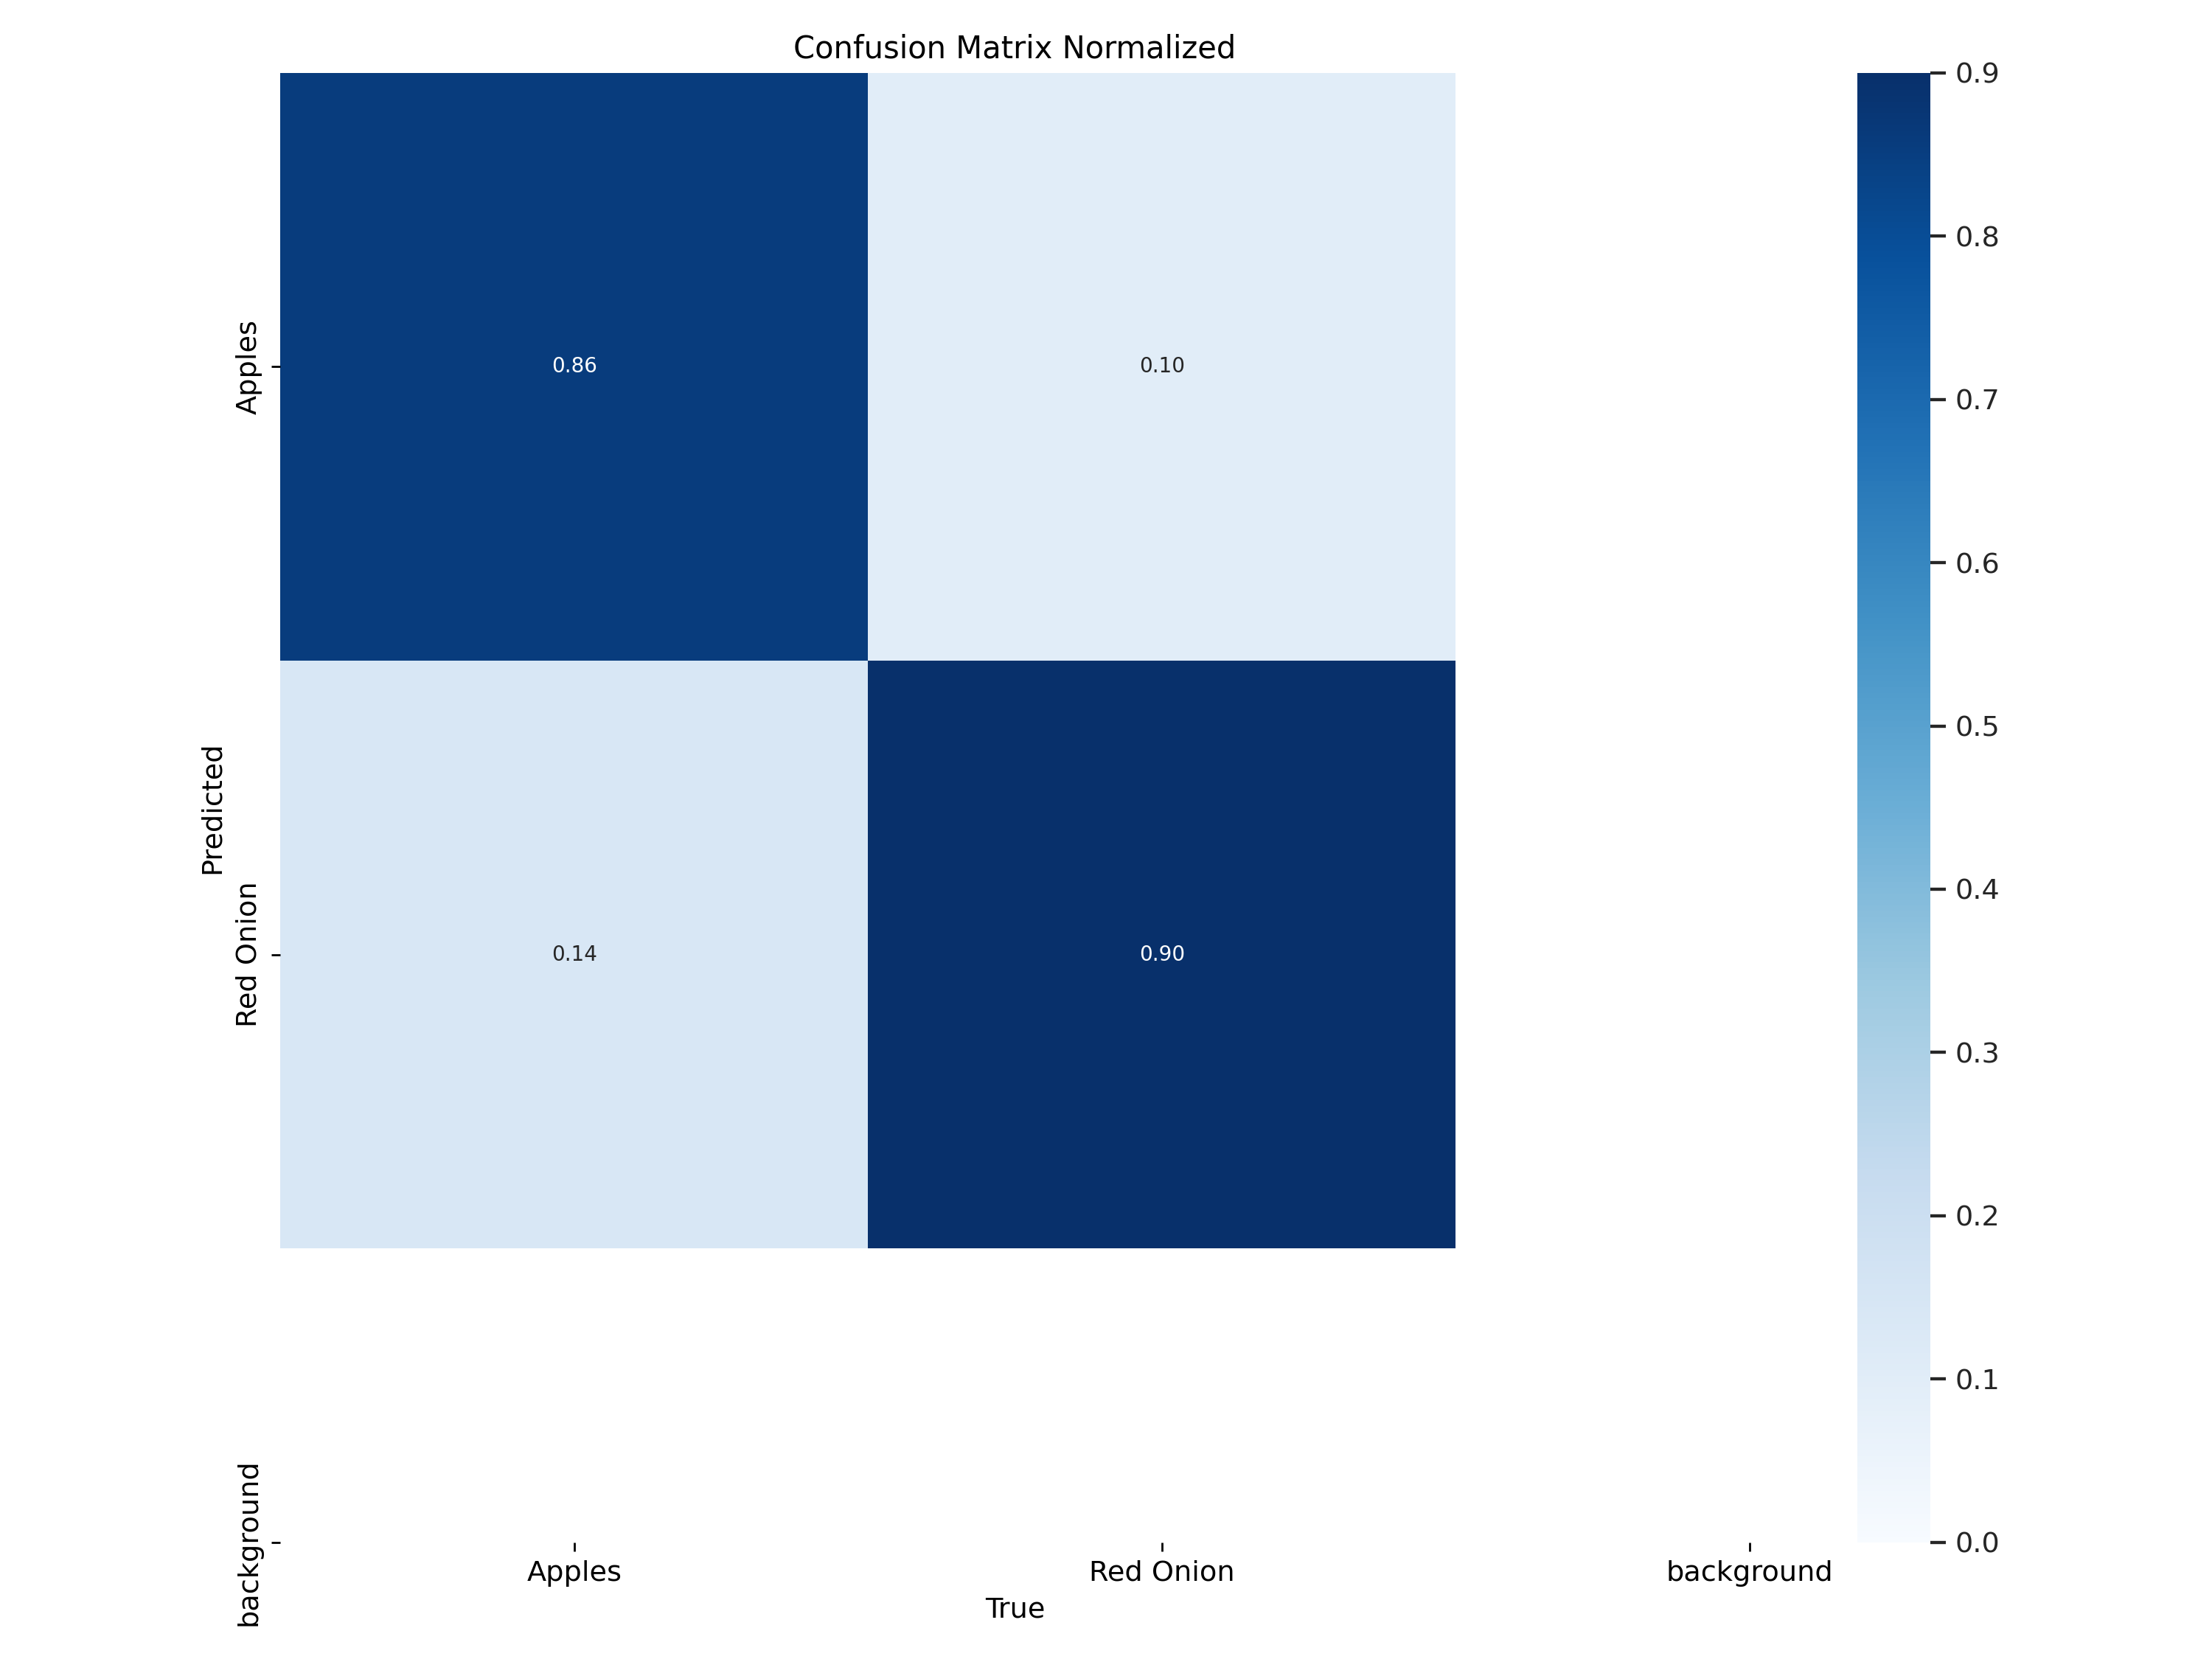

In [32]:
%matplotlib inline
from PIL import Image

#confusing matrix for train 3 (model 2, nano epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)
Image.open('/content/drive/MyDrive/Colab Notebooks/Computer Vision/runs/classify/val11/confusion_matrix_normalized.png')

### Model 3 (s, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640) (val8old) (val12)

In [40]:
#MODEL3 (s, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)

metrics3 = model3.val()
#because we only have 2 classes!
metrics3.top1

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s-cls summary (fused): 73 layers, 5077762 parameters, 0 gradients, 12.4 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... found 56 images in 2 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... found 26 images in 2 classes ✅ 
test: None...


val: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... 24 images, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:18<00:00,  9.48s/it]


                   all      0.917          1
Speed: 0.0ms preprocess, 284.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val12


0.9166666865348816

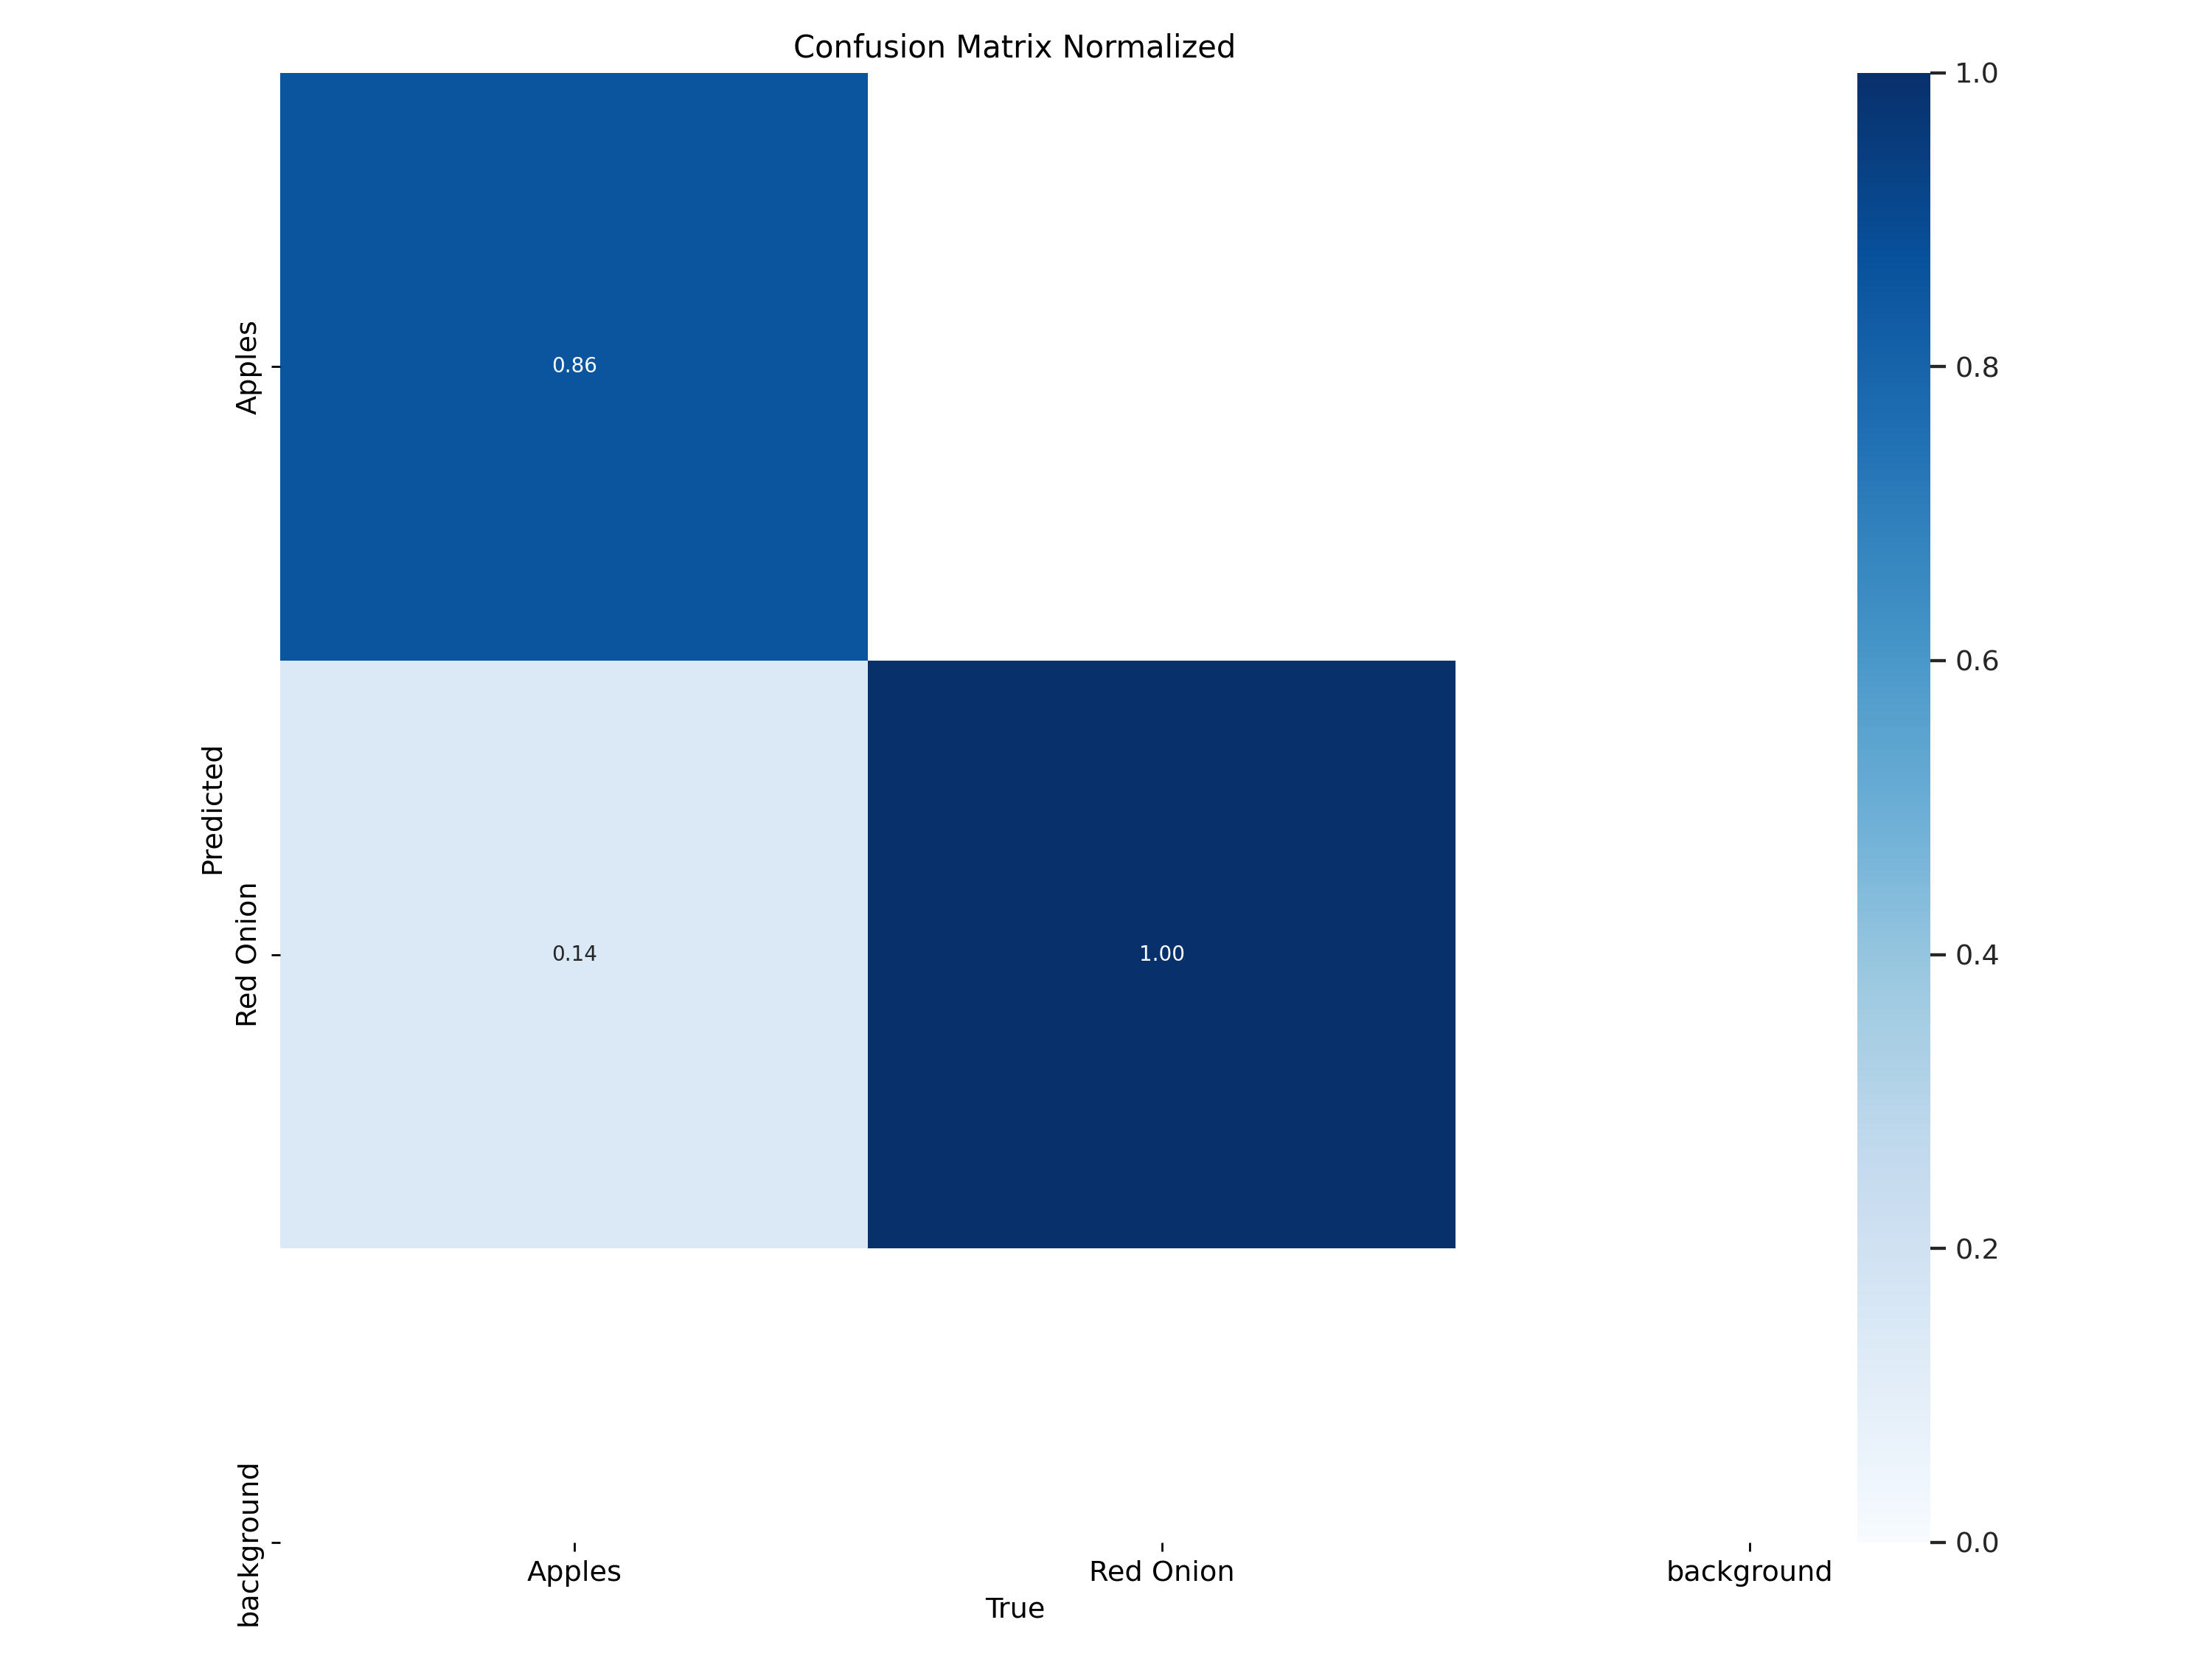

In [41]:
%matplotlib inline
from PIL import Image

#confusing matrix for train 2 (model 3, s, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)
Image.open('/content/drive/MyDrive/Colab Notebooks/Computer Vision/runs/classify/val12/confusion_matrix_normalized.png')

### Model 4 (m, epochs=25,patience=5,batch=8, imgsz=640) (val9old) (val13)

In [50]:
#https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

#MODEL4 (m, epochs=17,patience=5,batch=8, imgsz=640)

metrics4 = model4.val()
#because we only have 2 classes!
metrics4.top1

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8m-cls summary (fused): 103 layers, 15765218 parameters, 0 gradients, 41.6 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... found 56 images in 2 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... found 26 images in 2 classes ✅ 
test: None...


val: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... 24 images, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:38<00:00, 19.41s/it]


                   all          1          1
Speed: 0.0ms preprocess, 1139.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val13


1.0

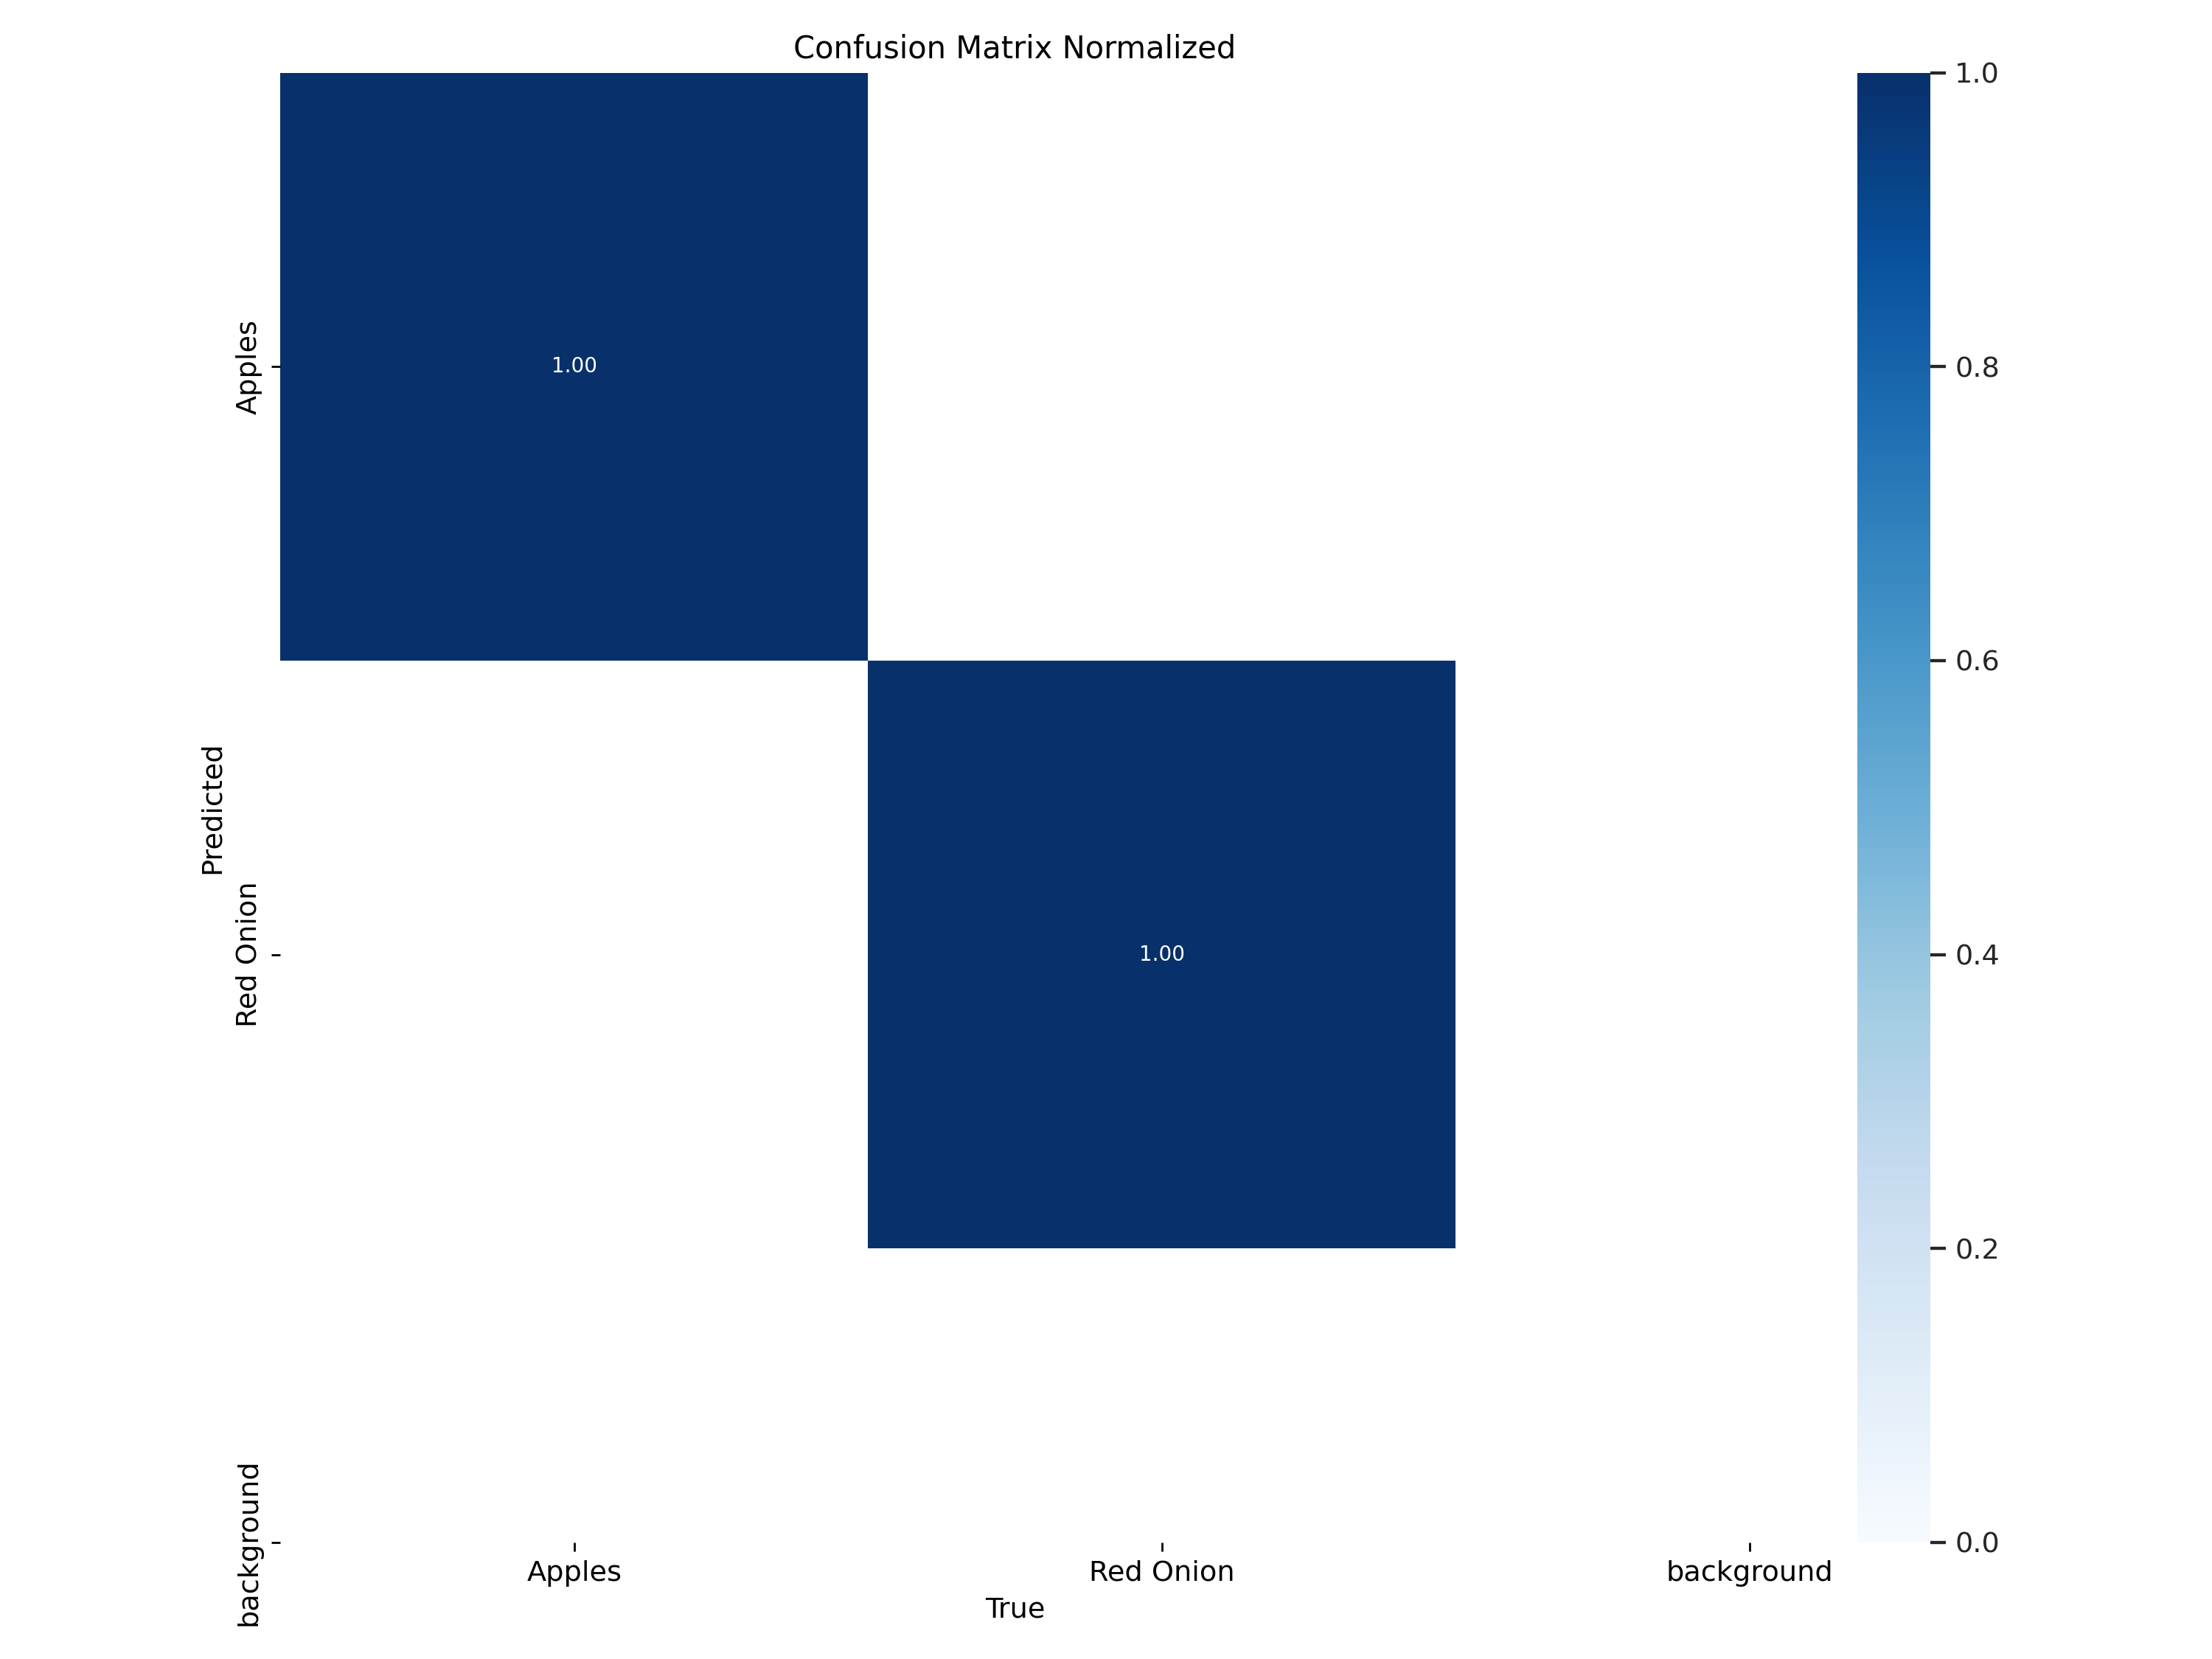

In [51]:
%matplotlib inline
from PIL import Image

#confusing matrix for val 9 (model 4, m, epochs=25,patience=5,batch=8,imgsz=640)
Image.open('/content/drive/MyDrive/Colab Notebooks/Computer Vision/runs/classify/val13/confusion_matrix_normalized.png')

##Prediction

Testing the model with a  random one off image

In [20]:
model.names

{0: 'Apples', 1: 'Red Onion'}

### Model 1 (nano, epochs=2, patience=5, batch=8, lr0=0.0005, imgsz=640) (predict3old) (predict6)

In [34]:
#model 1 (nano, epochs=2, patience=5, batch=8, lr0=0.0005, imgsz=640)
results = model('https://github.com/merfurfu/Computer-Vision-Project/blob/vic_work/predict1.jpg', save=True)

for r in results:
  print(r.probs)

#this model predicted apples, this image is red onion (WRONG) (Apples 0.62, Red Onion 0.38)


Found https://github.com/merfurfu/Computer-Vision-Project/blob/vic_work/predict1.jpg locally at predict1.jpg
image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/predict1.jpg: 640x640 Apples 0.62, Red Onion 0.38, 98.2ms
Speed: 112.5ms preprocess, 98.2ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict6
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.6157, 0.3843])
orig_shape: None
shape: torch.Size([2])
top1: 0
top1conf: tensor(0.6157)
top5: [0, 1]
top5conf: tensor([0.6157, 0.3843])


In [35]:
results = model('/content/drive/MyDrive/Colab Notebooks/Computer Vision/prediction3.jpg', save=True)

for r in results:
  print(r.probs)

#this model predicted apples (CORRECT) (Apples 0.56, Red Onion 0.44)


image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/prediction3.jpg: 640x640 Apples 0.56, Red Onion 0.44, 104.6ms
Speed: 102.2ms preprocess, 104.6ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict6
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.5557, 0.4443])
orig_shape: None
shape: torch.Size([2])
top1: 0
top1conf: tensor(0.5557)
top5: [0, 1]
top5conf: tensor([0.5557, 0.4443])


### Model 2 (n, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640) (predict2old) (predict7)

In [36]:
#model 2 (n, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)
results = model2('https://github.com/merfurfu/Computer-Vision-Project/blob/vic_work/predict1.jpg', save=True)

for r in results:
  print(r.probs)
#predicted it as apple again (INCORRECT)(Apples 0.72, Red Onion 0.28)


Found https://github.com/merfurfu/Computer-Vision-Project/blob/vic_work/predict1.jpg locally at predict1.jpg
image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/predict1.jpg: 640x640 Apples 0.72, Red Onion 0.28, 153.4ms
Speed: 171.4ms preprocess, 153.4ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict7
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.7190, 0.2810])
orig_shape: None
shape: torch.Size([2])
top1: 0
top1conf: tensor(0.7190)
top5: [0, 1]
top5conf: tensor([0.7190, 0.2810])


In [37]:
#model 2 (n, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)
results2 = model2('/content/drive/MyDrive/Colab Notebooks/Computer Vision/prediction3.jpg', save=True)

for r in results:
  print(r.probs)
 #model predicted apple which is correct (Apples 0.54, Red Onion 0.46)


image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/prediction3.jpg: 640x640 Apples 0.54, Red Onion 0.46, 144.3ms
Speed: 160.1ms preprocess, 144.3ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict7
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.7190, 0.2810])
orig_shape: None
shape: torch.Size([2])
top1: 0
top1conf: tensor(0.7190)
top5: [0, 1]
top5conf: tensor([0.7190, 0.2810])


### Model 3 (s, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640) (predict4old) (predict8)

In [43]:
#Model 3 (s, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)
results = model3('https://github.com/merfurfu/Computer-Vision-Project/blob/vic_work/predict1.jpg', save=True)

for r in results:
  print(r.probs)
#predicted it as apple again!!!!!!!!!!!(INCORRECT)(Apples 0.55, Red Onion 0.45)


Found https://github.com/merfurfu/Computer-Vision-Project/blob/vic_work/predict1.jpg locally at predict1.jpg
image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/predict1.jpg: 640x640 Apples 0.55, Red Onion 0.45, 276.8ms
Speed: 119.2ms preprocess, 276.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict8
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.5527, 0.4473])
orig_shape: None
shape: torch.Size([2])
top1: 0
top1conf: tensor(0.5527)
top5: [0, 1]
top5conf: tensor([0.5527, 0.4473])


In [44]:
results = model3('/content/drive/MyDrive/Colab Notebooks/Computer Vision/prediction3.jpg', save=True)

for r in results:
  print(r.probs)
#predicted it as red onion ????? ???? ??? (INCORRECT)(Red Onion 0.52, Apples 0.48)


image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/prediction3.jpg: 640x640 Red Onion 0.52, Apples 0.48, 284.0ms
Speed: 100.6ms preprocess, 284.0ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict8
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.4751, 0.5249])
orig_shape: None
shape: torch.Size([2])
top1: 1
top1conf: tensor(0.5249)
top5: [1, 0]
top5conf: tensor([0.5249, 0.4751])


### Model 4 (m, epochs=17,patience=5,batch=8, imgsz=640)

In [52]:
#Model 4 (m, epochs=100,patience=5,batch=8, imgsz=640)
results = model4('https://github.com/merfurfu/Computer-Vision-Project/blob/vic_work/predict1.jpg', save=True)

for r in results:
  print(r.probs)

#also incorrect(Apples 0.55, Red Onion 0.45)


Found https://github.com/merfurfu/Computer-Vision-Project/blob/vic_work/predict1.jpg locally at predict1.jpg
image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/predict1.jpg: 640x640 Apples 0.55, Red Onion 0.45, 813.2ms
Speed: 120.4ms preprocess, 813.2ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict9
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.5523, 0.4477])
orig_shape: None
shape: torch.Size([2])
top1: 0
top1conf: tensor(0.5523)
top5: [0, 1]
top5conf: tensor([0.5523, 0.4477])


In [53]:
results = model4('/content/drive/MyDrive/Colab Notebooks/Computer Vision/prediction3.jpg', save=True)

for r in results:
  print(r.probs)

#predicted it as red onion but ALSO barely (Apples 0.50, Red Onion 0.50)


image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/prediction3.jpg: 640x640 Red Onion 0.50, Apples 0.50, 844.4ms
Speed: 373.0ms preprocess, 844.4ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict9
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.4958, 0.5042])
orig_shape: None
shape: torch.Size([2])
top1: 1
top1conf: tensor(0.5042)
top5: [1, 0]
top5conf: tensor([0.5042, 0.4958])
